In [418]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import timeit
warnings.filterwarnings("ignore")

In [419]:
df = pd.read_csv('input/LAMOST_final.csv')

In [420]:
df = df.dropna()
df

,obsid,ra,dec,redshift,class,mag1,mag2,mag3,mag4,mag5
0,210198,43.088799,-1.577594,-0.000038,STAR,19.75,17.54,16.62,16.27,16.06
2,106084,334.003910,-0.001640,0.123472,GALAXY,19.74,18.54,17.74,17.36,17.15
3,8204141,12.417300,2.166760,0.109395,GALAXY,19.76,18.54,17.85,17.48,17.17
4,43111178,208.960390,4.183370,0.174657,GALAXY,19.31,18.25,17.51,17.12,16.90
5,8202185,11.020312,1.561901,0.428038,QSO,16.87,16.68,16.75,16.68,16.57
...,...,...,...,...,...,...,...,...,...,...
29994,8305163,50.820120,4.086140,1.296480,QSO,19.22,19.22,18.88,18.92,18.90
29996,67702208,323.729502,0.182460,3.288760,QSO,24.63,19.15,18.82,18.74,18.68
29997,8209182,13.833480,3.312840,0.082647,GALAXY,19.65,18.49,17.88,17.49,17.23
29998,21202172,121.822210,1.429060,0.094170,GALAXY,19.18,18.06,17.53,17.20,17.01


In [421]:
df['redshift'] = df['redshift'].abs()

In [422]:
df['class'].value_counts()

QSO       9100
GALAXY    8783
STAR      4627
Name: class, dtype: int64

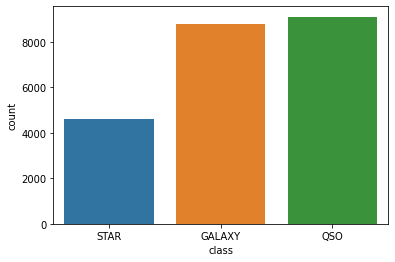

In [423]:
df['class'].head(10)
ax = sns.countplot(x='class',data=df)

In [424]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)


,class,redshift
2,STAR,0.000257
1,QSO,1.494844
0,GALAXY,0.125577


# Distance


In [425]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['redshift'])
df['distance']= r.value

df

,obsid,ra,dec,redshift,class,mag1,mag2,mag3,mag4,mag5,l,b,distance
0,210198,43.088799,-1.577594,0.000038,STAR,19.75,17.54,16.62,16.27,16.06,176.658778,-51.373070,0.163475
2,106084,334.003910,-0.001640,0.123472,GALAXY,19.74,18.54,17.74,17.36,17.15,62.440220,-43.873887,519.452928
3,8204141,12.417300,2.166760,0.109395,GALAXY,19.76,18.54,17.85,17.48,17.17,122.028947,-60.701887,461.726465
4,43111178,208.960390,4.183370,0.174657,GALAXY,19.31,18.25,17.51,17.12,16.90,339.563109,62.382657,726.030818
5,8202185,11.020312,1.561901,0.428038,QSO,16.87,16.68,16.75,16.68,16.57,119.106811,-61.255197,1670.999141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,8305163,50.820120,4.086140,1.296480,QSO,19.22,19.22,18.88,18.92,18.90,178.410967,-41.868331,4044.088957
29996,67702208,323.729502,0.182460,3.288760,QSO,24.63,19.15,18.82,18.74,18.68,54.650118,-35.514182,6775.743979
29997,8209182,13.833480,3.312840,0.082647,GALAXY,19.65,18.49,17.88,17.49,17.23,124.850579,-59.544393,350.963253
29998,21202172,121.822210,1.429060,0.094170,GALAXY,19.18,18.06,17.53,17.20,17.01,220.519037,17.486813,398.850707


In [426]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,obsid,ra,dec,redshift,class,mag1,mag2,mag3,mag4,mag5,l,b,distance,x_coord,y_coord,z_coord
0,210198,43.088799,-1.577594,0.000038,STAR,19.75,17.54,16.62,16.27,16.06,176.658778,-51.373070,0.163475,0.119340,0.111632,-0.004501
2,106084,334.003910,-0.001640,0.123472,GALAXY,19.74,18.54,17.74,17.36,17.15,62.440220,-43.873887,519.452928,466.896737,-227.681314,-0.014869
3,8204141,12.417300,2.166760,0.109395,GALAXY,19.76,18.54,17.85,17.48,17.17,122.028947,-60.701887,461.726465,450.603077,99.214154,17.456992
4,43111178,208.960390,4.183370,0.174657,GALAXY,19.31,18.25,17.51,17.12,16.90,339.563109,62.382657,726.030818,-633.551562,-350.611018,52.963023
5,8202185,11.020312,1.561901,0.428038,QSO,16.87,16.68,16.75,16.68,16.57,119.106811,-61.255197,1670.999141,1639.575651,319.304473,45.546321


In [427]:
df['u-r'] = df['mag1']-df['mag4']

In [428]:
df = df.dropna()

In [429]:
df.head()

,obsid,ra,dec,redshift,class,mag1,mag2,mag3,mag4,mag5,l,b,distance,x_coord,y_coord,z_coord,u-r
0,210198,43.088799,-1.577594,0.000038,STAR,19.75,17.54,16.62,16.27,16.06,176.658778,-51.373070,0.163475,0.119340,0.111632,-0.004501,3.48
2,106084,334.003910,-0.001640,0.123472,GALAXY,19.74,18.54,17.74,17.36,17.15,62.440220,-43.873887,519.452928,466.896737,-227.681314,-0.014869,2.38
3,8204141,12.417300,2.166760,0.109395,GALAXY,19.76,18.54,17.85,17.48,17.17,122.028947,-60.701887,461.726465,450.603077,99.214154,17.456992,2.28
4,43111178,208.960390,4.183370,0.174657,GALAXY,19.31,18.25,17.51,17.12,16.90,339.563109,62.382657,726.030818,-633.551562,-350.611018,52.963023,2.19
5,8202185,11.020312,1.561901,0.428038,QSO,16.87,16.68,16.75,16.68,16.57,119.106811,-61.255197,1670.999141,1639.575651,319.304473,45.546321,0.19


In [430]:
df['class'] = df['class'].astype('category').cat.codes

In [431]:
df['class'].value_counts()

1    9100
0    8783
2    4627
Name: class, dtype: int64

In [432]:
df.columns

Index(['obsid', 'ra', 'dec', 'redshift', 'class', 'mag1', 'mag2', 'mag3',
       'mag4', 'mag5', 'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord',
       'u-r'],
      dtype='object')

In [433]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

,class,redshift
2,2,0.000257
1,1,1.494844
0,0,0.125577


In [434]:
X_df = df.drop(['obsid','class','l','b','x_coord','y_coord','z_coord',"distance",'u-r','ra','dec'], axis=1).values
y_df = df['class'].values

In [435]:
df.drop(['obsid','class','l','b','x_coord','y_coord','z_coord','u-r','distance','ra','dec'], axis=1)

,redshift,mag1,mag2,mag3,mag4,mag5
0,0.000038,19.75,17.54,16.62,16.27,16.06
2,0.123472,19.74,18.54,17.74,17.36,17.15
3,0.109395,19.76,18.54,17.85,17.48,17.17
4,0.174657,19.31,18.25,17.51,17.12,16.90
5,0.428038,16.87,16.68,16.75,16.68,16.57
...,...,...,...,...,...,...
29994,1.296480,19.22,19.22,18.88,18.92,18.90
29996,3.288760,24.63,19.15,18.82,18.74,18.68
29997,0.082647,19.65,18.49,17.88,17.49,17.23
29998,0.094170,19.18,18.06,17.53,17.20,17.01


In [436]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=44, shuffle =True)

In [437]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier(n_estimators=200)

start_time_train = timeit.default_timer()
random_forest.fit(X_train, y_train)
upsampling_elapsed = timeit.default_timer() - start_time_train
print('Training time for RBF: ' + str(upsampling_elapsed))

Training time for RBF: 3.320656299998518


In [438]:
y_pred = random_forest.predict(X_test)

Test_acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  99.311


In [439]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1764
           1       0.99      0.99      0.99      1803
           2       1.00      1.00      1.00       935

    accuracy                           0.99      4502
   macro avg       0.99      0.99      0.99      4502
weighted avg       0.99      0.99      0.99      4502



In [440]:
confusion_matrix(y_test, y_pred)

array([[1749,   14,    1],
       [  16, 1787,    0],
       [   0,    0,  935]], dtype=int64)

# SDSS Test

In [457]:
df = pd.read_csv('Test/sdss.csv')

In [458]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,94,301,6,93,4.830000e+18,GALAXY,0.399651,4286,55499,322
1,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,94,4.300000e+17,GALAXY,0.032125,382,51816,368
2,1.240000e+18,15.896126,1.264845,20.14134,19.28787,19.04397,18.96897,18.79573,94,301,6,274,4.460000e+17,STAR,-0.000821,396,51816,370
3,1.240000e+18,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,94,301,6,275,7.540000e+17,GALAXY,0.312048,670,52520,374
4,1.240000e+18,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,94,301,6,275,7.540000e+17,GALAXY,0.200468,670,52520,367


In [459]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import WMAP9 as cosmo

radec = SkyCoord(ra=df['ra']*u.degree, dec=df['dec']*u.degree, frame='icrs')
#radec.ra.value
#radec.dec.value
galactic = radec.galactic

df['l'] = galactic.l.value
df['b'] = galactic.b.value


r = cosmo.comoving_distance(df['z'])
df['distance']= r.value

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distance
0,1.240000e+18,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,94,301,...,93,4.830000e+18,GALAXY,0.399651,4286,55499,322,79.914118,-53.382197,10889.870466
1,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,...,94,4.300000e+17,GALAXY,0.032125,382,51816,368,79.999146,-53.417022,10737.784722
2,1.240000e+18,15.896126,1.264845,20.14134,19.28787,19.04397,18.96897,18.79573,94,301,...,274,4.460000e+17,STAR,-0.000821,396,51816,370,129.295662,-61.456728,10923.741026
3,1.240000e+18,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,94,301,...,275,7.540000e+17,GALAXY,0.312048,670,52520,374,129.523245,-61.451201,10804.270479
4,1.240000e+18,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,94,301,...,275,7.540000e+17,GALAXY,0.200468,670,52520,367,129.553380,-61.441430,10892.221138


In [460]:
df[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

,class,redshift
2,STAR,0.000095
1,QSO,1.683068
0,GALAXY,0.265592


In [461]:
def cartesian(dist,alpha,delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df['distance'],df['ra'],df['dec'])
df['x_coord'] = cart[0]
df['y_coord'] = cart[1]
df['z_coord'] = cart[2]

df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,...,redshift,plate,mjd,fiberid,l,b,distance,x_coord,y_coord,z_coord
0,1.240000e+18,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,94,301,...,0.399651,4286,55499,322,79.914118,-53.382197,10889.870466,10681.369075,-2107.009227,241.133953
1,1.240000e+18,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,...,0.032125,382,51816,368,79.999146,-53.417022,10737.784722,10534.404562,-2066.284901,238.344241
2,1.240000e+18,15.896126,1.264845,20.14134,19.28787,19.04397,18.96897,18.79573,94,301,...,-0.000821,396,51816,370,129.295662,-61.456728,10923.741026,10503.455416,2991.220279,241.129770
3,1.240000e+18,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,94,301,...,0.312048,670,52520,374,129.523245,-61.451201,10804.270479,10382.967155,2978.231268,237.470296
4,1.240000e+18,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,94,301,...,0.200468,670,52520,367,129.553380,-61.441430,10892.221138,10466.651187,3005.266629,240.970378


In [462]:
df['u-r'] = df['u']-df['r']

In [463]:
df['class']=df['class'].map({'STAR':2,'GALAXY':0,'QSO':1}).astype(int)

In [464]:
df = df.dropna()
# obsid', 'ra', 'dec', 'redshift', 'class', 'mag1', 'mag2', 'mag3',
#        'mag4', 'mag5', 'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord',
#        'u-r'

In [465]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid',
       'l', 'b', 'distance', 'x_coord', 'y_coord', 'z_coord', 'u-r'],
      dtype='object')

In [466]:
columns_titles = ["redshift","u","g","i","r","z","class"]
data=df.reindex(columns=columns_titles)

In [467]:
data.head()

,redshift,u,g,i,r,z,class
0,0.399651,25.92735,20.99570,18.56461,19.24612,18.43049,0
1,0.032125,19.38905,18.24496,17.20807,17.58728,16.90905,0
2,-0.000821,20.14134,19.28787,18.96897,19.04397,18.79573,2
3,0.312048,21.50923,19.69340,17.91998,18.47973,17.55132,0
4,0.200468,20.96947,20.29136,18.86387,19.36779,18.45551,0


In [468]:
y_df = data['class']
X_df = data.loc[:, data.columns != 'class'].values

In [469]:
y_pred = random_forest.predict(X_df)

In [470]:
Test_acc_random_forest = round(random_forest.score(X_df, y_df) * 100, 3)
print("Accuracy of Random Forest ",Test_acc_random_forest)

Accuracy of Random Forest  74.849


In [471]:
print(classification_report(y_df, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.58      0.73       589
           1       0.23      0.95      0.37        76
           2       0.99      1.00      1.00       329

    accuracy                           0.75       994
   macro avg       0.74      0.84      0.70       994
weighted avg       0.93      0.75      0.79       994



In [472]:
confusion_matrix(y_df, y_pred)

array([[343, 244,   2],
       [  3,  72,   1],
       [  0,   0, 329]], dtype=int64)

# 99.311 & 74.849